# **Water Jug Problem**

### **Problem Description**

<small style="font-size: 15px;">

**State Representation:** 

A state is represented by the current amount of water in both jugs.

**Initial State:**

Both jugs are empty.

**Goal State:**  

Either jug&nbsp;-&nbsp;1 or jug&nbsp;-&nbsp;2 contains the target amount of water.

**Actions:**  

The allowed actions involve,
- Empty Jug&nbsp;-&nbsp;1.

- Empty Jug&nbsp;-&nbsp;2.

- Fill Jug&nbsp;-&nbsp;1 completely.

- Fill Jug&nbsp;-&nbsp;2 completely.

- Pour water from Jug&nbsp;-&nbsp;1 to Jug&nbsp;-&nbsp;2 until Jug&nbsp;-&nbsp;2 is full or Jug&nbsp;-&nbsp;1 is empty.

- Pour water from Jug&nbsp;-&nbsp;2 to Jug&nbsp;-&nbsp;1 until Jug&nbsp;-&nbsp;1 is full or Jug&nbsp;-&nbsp;2 is empty.

**Transition Model:**  

Defines how one state transitions to another when an action is performed.

**Path Cost:**  

Each operation takes 1 second of time. The cost is the number of steps taken until the goal is reached or the time limit is exceeded.

**Solution Approach:**  

The given code implements a greedy simulation strategy to solve the classic Water Jug Problem, where the goal is to measure an exact target quantity of water using two jugs of given capacities and limited time. The simulation follows a fixed sequence of actions. it prioritizes filling Jug&nbsp;-&nbsp;1 to its full capacity, then transfers water from Jug&nbsp;-&nbsp;1 to Jug&nbsp;-&nbsp;2 until Jug&nbsp;-&nbsp;2 is full or Jug&nbsp;-&nbsp;1 is empty, and empties Jug&nbsp;-&nbsp;2 when it reaches its maximum capacity to make space for further transfers. This loop continues until either jug contains the target amount of water or the predefined time limit is exceeded. Before beginning the simulation, the code checks whether the problem is solvable by verifying if the target is less than or equal to the maximum jug capacity and divisible by the greatest common divisor of the two jug capacities. This feasibility condition stems from number theory, which states that only multiples of the GCD of two numbers can be obtained through combinations of those numbers. If the conditions are met, the simulation begins and uses visual updates through bar plots to display the state of both jugs after every action step, until the goal is reached or time runs out.

</small>

### **Implementation**

Enter Jug - 1 capacity: 
5
Enter Jug - 2 capacity: 
3
Enter target value: 
4
Enter time limit: 
10
Capacity of Jug - 1 = 5, Capacity of Jug - 2 = 3, Target = 4, Time Limit = 10

Filled Jug - 1


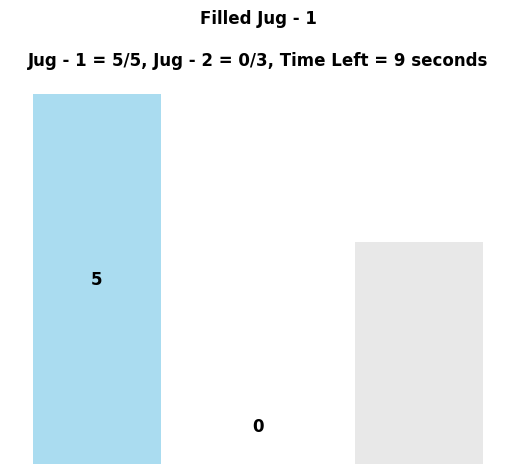

Time Left = 9 seconds

Transferred Water: Jug - 1 = 2, Jug - 2 = 3


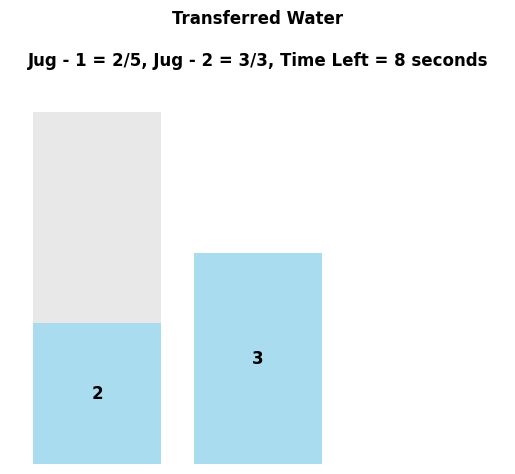

Time Left = 8 seconds

Emptied Jug - 2


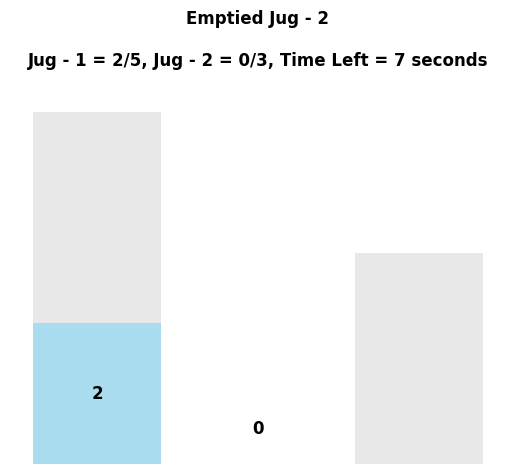

Time Left = 7 seconds

Transferred Water: Jug - 1 = 0, Jug - 2 = 2


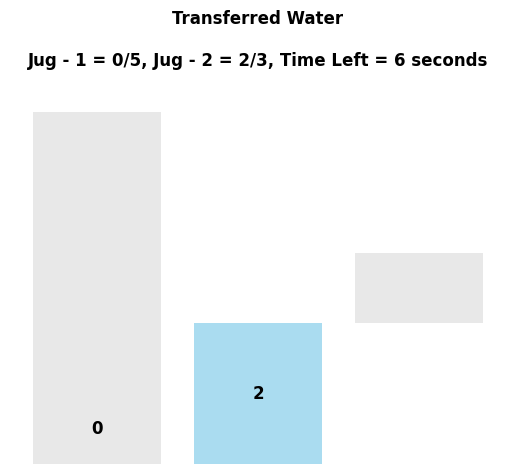

Time Left = 6 seconds

Filled Jug - 1


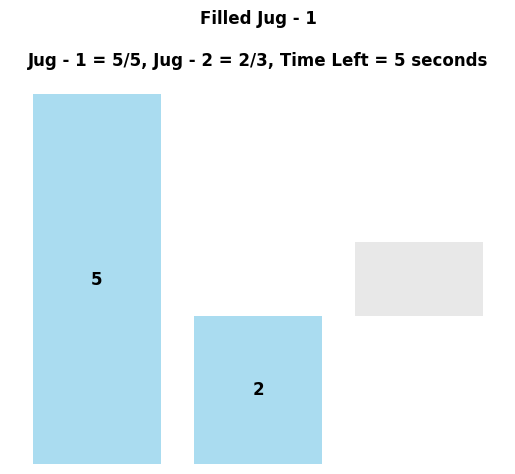

Time Left = 5 seconds

Transferred Water: Jug - 1 = 4, Jug - 2 = 3


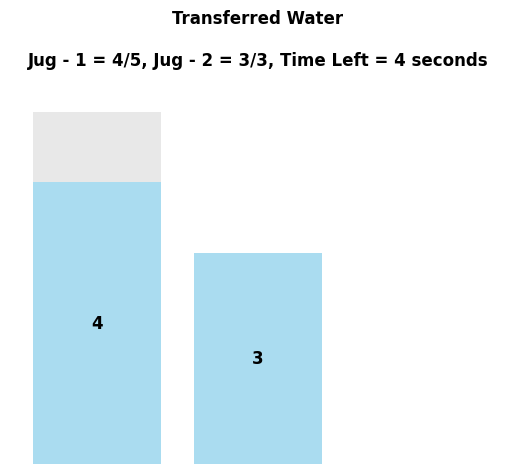

Time Left = 4 seconds



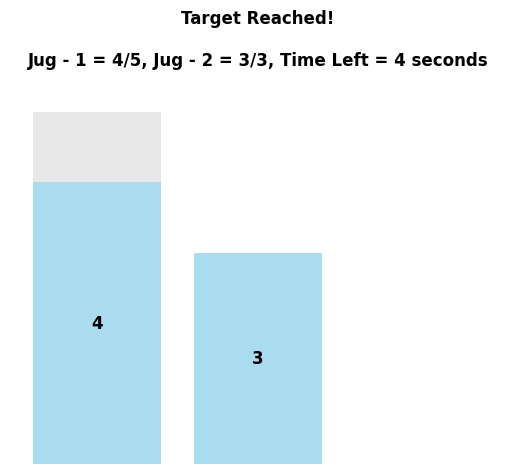

Target value reached! Jug - 1 = 4, Jug - 2 = 3


In [2]:
import matplotlib.pyplot as plt 
import math
import time 
def display_jugs(jug1, jug2, cap1, cap2, step_desc, time_left):
    plt.bar(["Jug1", "Jug2"], [jug1, jug2], color='skyblue', alpha=0.7)
    plt.bar(["Jug1", "Jug 2"], [cap1-jug1, cap2-jug2], bottom=[jug1, jug2], color='lightgray', alpha=0.5)
    plt.axis('off')
    plt.title(f"{step_desc}\n\nJug - 1 = {jug1}/{cap1}, Jug - 2 = {jug2}/{cap2}, Time Left = {time_left} seconds\n", color='black', fontsize=12, fontweight='bold')
    for i, val in enumerate([jug1, jug2]):
        if val > 0 :
            plt.text(i, val / 2, f"{val}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')
        else:
            plt.text(i, 0.5, f"{val}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    plt.pause(1)
print("Enter Jug - 1 capacity: ")
cap1 = int(input())
print(cap1)
print("Enter Jug - 2 capacity: ")
cap2 = int(input())
print(cap2)
print("Enter target value: ")
target = int(input())
print(target)
print("Enter time limit: ")
time_limit = int(input())
print(time_limit)
if target > max(cap1, cap2) or target % math.gcd(cap1, cap2) != 0:
    print("No solution possible for the given capacities and target.")
else:
    if cap2 > cap1:
        cap1, cap2 = cap2, cap1
    jug1, jug2 = 0, 0
    print(f"Capacity of Jug - 1 = {cap1}, Capacity of Jug - 2 = {cap2}, Target = {target}, Time Limit = {time_limit}\n")
    while jug1 != target and jug2 != target:
        if time_limit <= 0:
            print("Time limit exceeded!")
            display_jugs(jug1, jug2, cap1, cap2, "Time Over!", time_limit)
            break
        if jug1 == 0:
            jug1 = cap1
            step = "Filled Jug - 1"
            print(step)
        elif jug2 == cap2:
            jug2 = 0
            step = "Emptied Jug - 2"
            print(step)
        else:
            temp = min(jug1, cap2 - jug2)
            jug1 -= temp
            jug2 += temp
            step = "Transferred Water"
            print(step + f": Jug - 1 = {jug1}, Jug - 2 = {jug2}")
        time_limit -= 1
        display_jugs(jug1, jug2, cap1, cap2, step, time_limit)
        print(f"Time Left = {time_limit} seconds\n")
        if jug1 == target or jug2 == target:
            display_jugs(jug1, jug2, cap1, cap2, "Target Reached!", time_limit)
            print(f"Target value reached! Jug - 1 = {jug1}, Jug - 2 = {jug2}")
            break
plt.show()